In [52]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [42]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == '06').all()

In [43]:
#  3. Convert the June temperatures to a list.
june_temps = list(june_results)

In [50]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['date', 'June Temps'])

In [51]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [46]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = []
dec_results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime('%m', Measurement.date) == '12').all()

In [47]:
# 7. Convert the December temperatures to a list.
dec_temps = list(dec_results)

In [48]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date','Dec. Temps'])

In [49]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,Dec. Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Plotting Results

In [53]:
june = june_temps_df['June Temps']
dec = dec_temps_df['Dec. Temps']

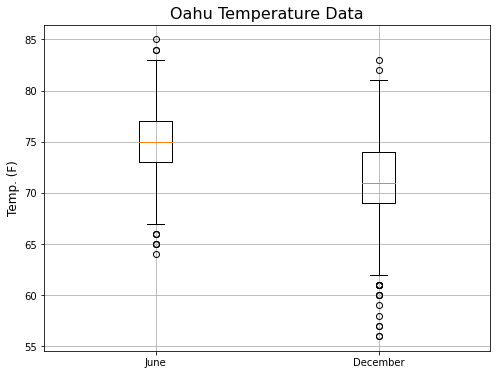

In [63]:
x_labels = ['June', 'December']
fig, ax = plt.subplots(figsize=(8,6))
temp_data = [june, dec]
ax.set_title('Oahu Temperature Data', fontsize=16)
ax.set_ylabel('Temp. (F)', fontsize=12)
ax.boxplot(temp_data, labels=x_labels)
ax.grid()
plt.savefig('Oahu_Temps')
plt.show()